<a href="https://colab.research.google.com/github/shivani1804/eda/blob/main/Uber_Request_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries
Importing the main python libraries to perform eda 

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
sns.set_style("darkgrid")

### Reading the data
Requesting the csv file to be stored in variable df and checking first five values of the dataset 


In [75]:
df =pd.read_csv("/Uber Request Data.csv")
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47



*	Request id:
 A unique identifier of the request
* Pickup point:
The point from which the request was made
* Driver id:
The unique identification number of the driver
*   Status
The final status of the trip, that can be either completed, cancelled by the driver or no cars available
*   Request timestamp
The date and time at which the customer made the trip request
*   Drop timestamp
The drop-off date and time, in case the trip was completed











In [76]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


###Fetching data
From first five and last five data show that there is uneccesary month and year written.All the request belong to the month of july 2016 .

Therefore, we will remove the month and yer from the data to make it more readable and segrating the time with date also.

Converting timestamp datatype to object 


In [77]:
df['Request timestamp']=pd.to_datetime(df["Request timestamp"])
df['Drop timestamp']=pd.to_datetime(df["Drop timestamp"])

Fetching the date and the timing from the timestamps


In [78]:
df["Date"] = df["Request timestamp"].dt.day


In [79]:
df["Request hour"] =df["Request timestamp"].dt.hour

In [80]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8


In [81]:
data =df.drop(columns=["Drop timestamp" ,"Request timestamp"] ,axis =1)
data

,Request id,Pickup point,Driver id,Status,Date,Request hour
0,619,Airport,1.0,Trip Completed,7,11
1,867,Airport,1.0,Trip Completed,7,17
2,1807,City,1.0,Trip Completed,7,9
3,2532,Airport,1.0,Trip Completed,7,21
4,3112,City,1.0,Trip Completed,13,8
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15,23
6741,6752,Airport,NaN,No Cars Available,15,23
6742,6751,City,NaN,No Cars Available,15,23
6743,6754,City,NaN,No Cars Available,15,23


###Statistics about our data

In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Request id,6745.0,3384.644922,1955.099667,1.0,1691.0,3387.0,5080.0,6766.0
Driver id,4095.0,149.501343,86.051994,1.0,75.0,149.0,224.0,300.0
Date,6745.0,11.231431,3.487899,7.0,7.0,13.0,14.0,15.0
Request hour,6745.0,12.956709,6.504052,0.0,7.0,13.0,19.0,23.0


In [83]:
data.isna().sum()

Request id         0
Pickup point       0
Driver id       2650
Status             0
Date               0
Request hour       0
dtype: int64

###Visualizing the data


In [84]:
data["Status"].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [85]:
trips =data[["Request id"  ,"Status"]].groupby("Status").count()
trips

,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


<ipython-input-86-07b3db52a0a5>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=trips ,colors=["Red" ,"Green" ,"Orange"] ,labels =["Cancelled" ,"No Cars Available" ,'Trip Completed'] ,autopct ="%.0f%%" )


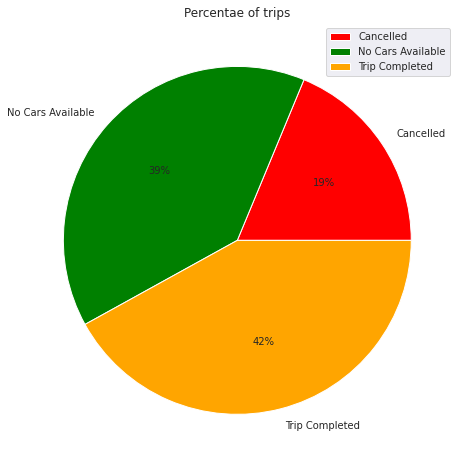

In [86]:
plt.figure(figsize =(10,8))
plt.pie(x=trips ,colors=["Red" ,"Green" ,"Orange"] ,labels =["Cancelled" ,"No Cars Available" ,'Trip Completed'] ,autopct ="%.0f%%" )
plt.legend()
plt.title("Percentae of trips")
plt.show()

This pie chart shows that there are many no car available status of trips .These are comparable with the trips completed .While the cancellation rate is a little bit high too but still less than the completed trips.


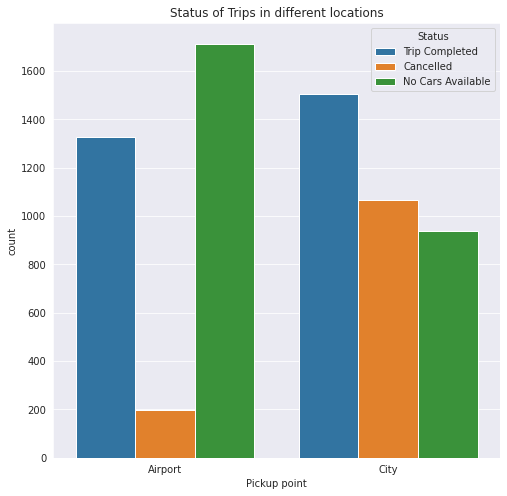

In [87]:
plt.figure(figsize =(8,8))
sns.countplot(x ="Pickup point" ,data =data ,hue ="Status")
plt.title("Status of Trips in different locations")
plt.show()

Insights about this graph: The access of ubers at the airport area is difficult.While the cancellation rate is less than 200 at airport, in cities it is more than 1000.

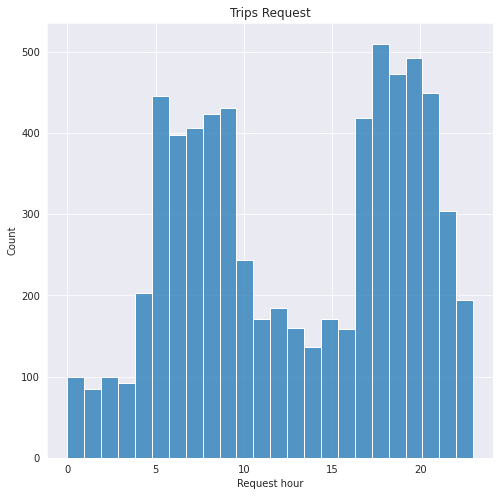

In [96]:
plt.figure(figsize =(8,8))
sns.histplot(data["Request hour"] ,bins =24 )
plt.title("Trips Request")
plt.show()

Throgh this we can se the uber requests are higher between 5-10 and 17-21

In [97]:
def daytime(time):
  if 2<time<6 :
    return "Early Morning"
  elif 6<= time<10 :
    return "Morning"
  elif 10<=time<17:
    return "Working Hours"
  elif 17<=time<22:
    return "Night"
  else:
    return "Late Night"


In [101]:
data["Shift"] = data["Request hour"].apply(lambda x: daytime(x))
data

,Request id,Pickup point,Driver id,Status,Date,Request hour,Shift
0,619,Airport,1.0,Trip Completed,7,11,Working Hours
1,867,Airport,1.0,Trip Completed,7,17,Night
2,1807,City,1.0,Trip Completed,7,9,Morning
3,2532,Airport,1.0,Trip Completed,7,21,Night
4,3112,City,1.0,Trip Completed,13,8,Morning
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15,23,Late Night
6741,6752,Airport,NaN,No Cars Available,15,23,Late Night
6742,6751,City,NaN,No Cars Available,15,23,Late Night
6743,6754,City,NaN,No Cars Available,15,23,Late Night


<Figure size 864x576 with 0 Axes>

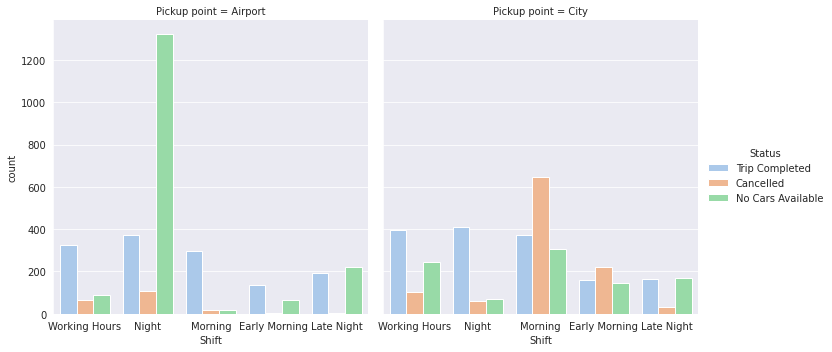

In [116]:
plt.figure(figsize =(12,8))
sns.catplot(x ="Shift", data =data ,kind ="count" ,palette ="pastel" ,hue ="Status" ,col ="Pickup point" )
plt.show()

#### At airport: 
In the night hours there are no cars available shown by the green block while in the morning shift most of the trips are completed and cancellation of ubers is negligible 


##### In city:
In morning cancellation are the highest  but after that everthing is balanced .
